https://www.kaggle.com/code/keithrek/pok-mon-generator-dcgan-pytorch

In [1]:
from __future__ import print_function

from PIL import Image
from IPython.display import HTML

import os
import torch
import random
import argparse
import torch.utils.data
import torch.nn.parallel

import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import torchvision.datasets as dset
import torch.backends.cudnn as cudnn
import matplotlib.animation as animation
import torchvision.transforms as transforms

manualSeed = random.randint(1, 10000)
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  5698


In [2]:
from model import Generator




<All keys matched successfully>

In [3]:
def plot_images(imgs, grid_size = 5):
    """
    imgs: vector containing all the numpy images
    grid_size: 2x2 or 5x5 grid containing images
    """
     
    fig = plt.figure(figsize = (8, 8))
    columns = rows = grid_size
    plt.title("Training Images")

    for i in range(1, columns*rows +1):
        plt.axis("off")
        fig.add_subplot(rows, columns, i)
        if i >= len(imgs):
            break
        plt.imshow(imgs[i])
    plt.show()
    plt.close()

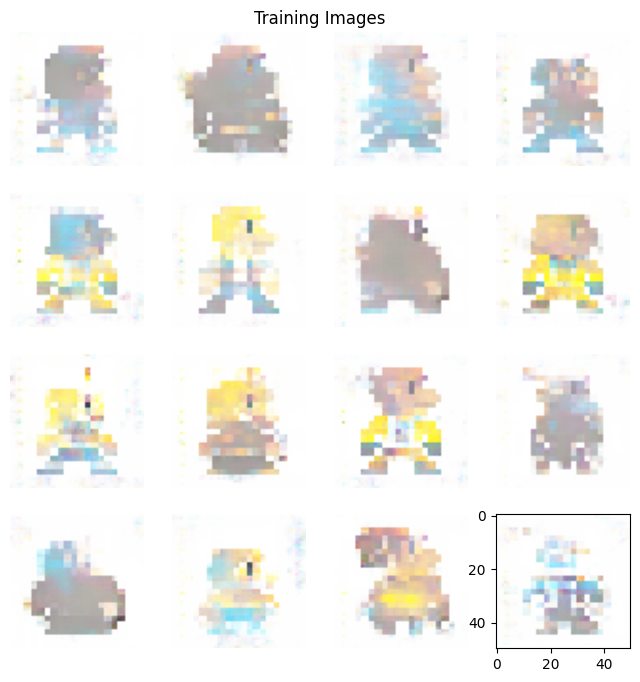

In [13]:
gen = Generator()
gen.load_state_dict(torch.load('generator.pth', map_location=torch.device('cpu')))
noise = torch.randn(32, 100, 1, 1, device = 'cpu')
img = gen(noise)
img = np.transpose(img.detach().numpy(), (0, 2, 3, 1))
img = (img + 1) / 2.0
plot_images(img, grid_size = 4)